In [1]:
# a model is represented by a regular Python class that inherits from the Module class

In [2]:
# 1) __init__ intitialize the model, 2) forward(make predictions to use model(x))

In [4]:
import torch
import torch.nn as nn
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()

        # to make b and w real parameters we need to wrap with nn.Parameter

        self.b = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self,x):
        #Computes the outputs / predictions
        return self.w*x + self.b

In [6]:
torch.manual_seed(42)
dummy = ManualLinearRegression()
list(dummy.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [7]:
dummy.state_dict() # keeps track only learnable parameters, grad=true


OrderedDict([('b', tensor([0.3367])), ('w', tensor([0.1288]))])

In [9]:
import torch.optim as optim
optimizer = optim.SGD(dummy.parameters(),lr=1e-1)
print(optimizer.state_dict())

{'state': {}, 'param_groups': [{'lr': 0.1, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1]}]}


In [25]:
import numpy as np
# Generate synthetic house price data
num_points = 100
square_feet = np.random.uniform(500, 5000, num_points)
price = 100 + 200 * square_feet + np.random.normal(0, 50000, num_points)

# Convert to tensors and reshape
X = torch.FloatTensor(square_feet.reshape(-1, 1))
y = torch.FloatTensor(price.reshape(-1, 1))
# Simple scaling - divide by maximum value
X = X / torch.max(X)
y = y / torch.max(y)


In [26]:
import torch
import torch.nn as nn
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()

        # to make b and w real parameters we need to wrap with nn.Parameter

        self.b = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self,x):
        #Computes the outputs / predictions
        return self.w*x + self.b

In [27]:
model = ManualLinearRegression()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=1e-1)
# Print initial parameters
print("Initial parameters:")
print(f"w = {model.w.item():.4f}")
print(f"b = {model.b.item():.4f}\n")


Initial parameters:
w = -0.6380
b = 2.2082



In [28]:
n_epochs = 1000
losses = list()

for epoch in range(n_epochs):
    model.train()
    yhat = model(X)
    loss = loss_fn(yhat,y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')
        print(f'w = {model.w.item():.4f}, b = {model.b.item():.4f}')



Epoch [100/1000], Loss: 0.0406
w = 0.1991, b = 0.4141
Epoch [200/1000], Loss: 0.0066
w = 0.6763, b = 0.1361
Epoch [300/1000], Loss: 0.0027
w = 0.8383, b = 0.0417
Epoch [400/1000], Loss: 0.0023
w = 0.8933, b = 0.0097
Epoch [500/1000], Loss: 0.0022
w = 0.9120, b = -0.0012
Epoch [600/1000], Loss: 0.0022
w = 0.9183, b = -0.0049
Epoch [700/1000], Loss: 0.0022
w = 0.9205, b = -0.0061
Epoch [800/1000], Loss: 0.0022
w = 0.9212, b = -0.0066
Epoch [900/1000], Loss: 0.0022
w = 0.9215, b = -0.0067
Epoch [1000/1000], Loss: 0.0022
w = 0.9216, b = -0.0068


Epoch [100/1000], Loss: 0.0194
w = 0.8669, b = 0.0000
Epoch [200/1000], Loss: 0.0015
w = 0.9818, b = 0.0000
Epoch [300/1000], Loss: 0.0012
w = 0.9971, b = -0.0000
Epoch [400/1000], Loss: 0.0011
w = 0.9991, b = -0.0000
Epoch [500/1000], Loss: 0.0011
w = 0.9994, b = -0.0000
Epoch [600/1000], Loss: 0.0011
w = 0.9994, b = -0.0000
Epoch [700/1000], Loss: 0.0011
w = 0.9994, b = -0.0000
Epoch [800/1000], Loss: 0.0011
w = 0.9994, b = 0.0000
Epoch [900/1000], Loss: 0.0011
w = 0.9994, b = 0.0000
Epoch [1000/1000], Loss: 0.0011
w = 0.9994, b = 0.0000

Final learned parameters (in original scale):
w = 198.9780 (true w ≈ 200)
b = 2762.5714 (true b ≈ 100)


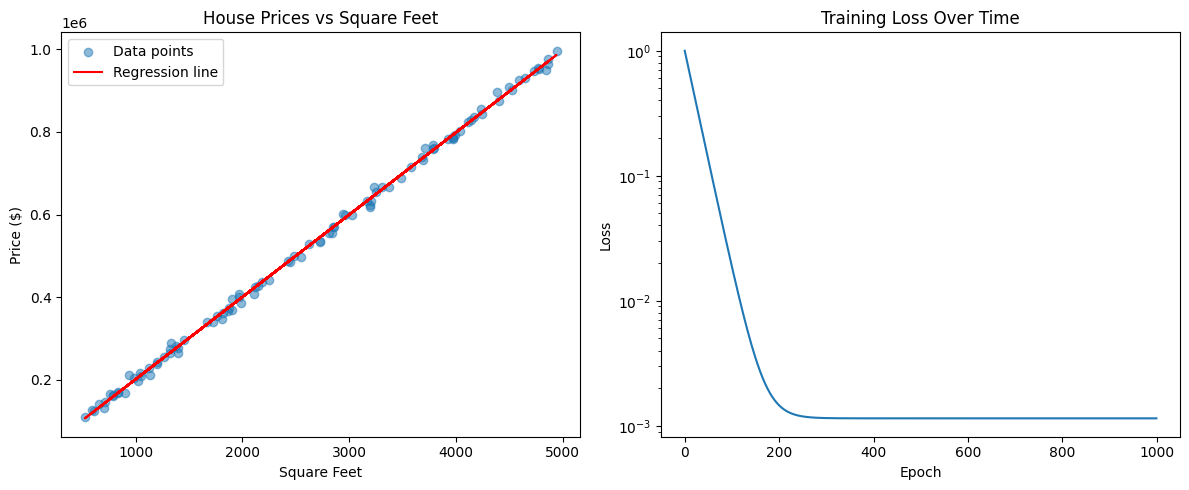


Example Predictions:
House size: 1000 sq ft => Predicted price: $201740.55
House size: 2000 sq ft => Predicted price: $400718.56
House size: 3000 sq ft => Predicted price: $599696.56
House size: 4000 sq ft => Predicted price: $798674.56


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize parameters to zeros
        self.b = nn.Parameter(torch.zeros(1, dtype=torch.float))
        self.w = nn.Parameter(torch.zeros(1, dtype=torch.float))

    def forward(self, x):
        # Computes the outputs / predictions
        return self.w * x + self.b

# Generate synthetic house price data
num_points = 100
square_feet = np.random.uniform(500, 5000, num_points)
price = 100 + 200 * square_feet + np.random.normal(0, 10000, num_points)  # Reduced noise

# Convert to numpy arrays and reshape
X = square_feet.reshape(-1, 1)
y = price.reshape(-1, 1)

# Initialize scalers
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Fit and transform data
X_normalized = X_scaler.fit_transform(X)
y_normalized = y_scaler.fit_transform(y)

# Convert numpy arrays to torch tensors
X_normalized = torch.from_numpy(X_normalized).float()
y_normalized = torch.from_numpy(y_normalized).float()

# Initialize model, loss, and optimizer
model = ManualLinearRegression()
loss_fn = nn.MSELoss(reduction='mean')
lr = 0.01  # Adjusted learning rate
optimizer = optim.SGD(model.parameters(), lr=lr)

# Training loop
n_epochs = 1000
losses = []

for epoch in range(n_epochs):
    model.train() # sets model for training mode
    optimizer.zero_grad()

    # Forward pass
    yhat = model(X_normalized)

    # Compute loss
    loss = loss_fn(yhat, y_normalized)
    losses.append(loss.item())

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')
        print(f'w = {model.w.item():.4f}, b = {model.b.item():.4f}')

# Get the final learned parameters
final_w = model.w.item()
final_b = model.b.item()

# Convert parameters back to original scale
original_w = final_w * (y_scaler.scale_[0] / X_scaler.scale_[0])
original_b = y_scaler.inverse_transform([[final_b]])[0][0] - original_w * X_scaler.mean_[0]

print(f'\nFinal learned parameters (in original scale):')
print(f'w = {original_w:.4f} (true w ≈ 200)')
print(f'b = {original_b:.4f} (true b ≈ 100)')

# Make predictions
model.eval()
with torch.no_grad():
    y_pred_normalized = model(X_normalized)
    # Convert predictions back to original scale
    y_pred = y_scaler.inverse_transform(y_pred_normalized.numpy())

# Plotting
plt.figure(figsize=(12, 5))

# Plot 1: Training Data and Regression Line
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, y_pred, 'r', label='Regression line')
plt.xlabel('Square Feet')
plt.ylabel('Price ($)')
plt.title('House Prices vs Square Feet')
plt.legend()

# Plot 2: Loss History
plt.subplot(1, 2, 2)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.yscale('log')

plt.tight_layout()
plt.show()

# Example predictions
test_sizes = np.array([[1000], [2000], [3000], [4000]])
test_normalized = X_scaler.transform(test_sizes)
test_normalized = torch.from_numpy(test_normalized).float()
with torch.no_grad():
    pred_normalized = model(test_normalized)
    predicted_prices = y_scaler.inverse_transform(pred_normalized.numpy())

print("\nExample Predictions:")
for size, price in zip(test_sizes, predicted_prices):
    print(f"House size: {size[0]:.0f} sq ft => Predicted price: ${price[0]:.2f}")


In [39]:
# Model Types

class MyLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)

    def forward(self,x):
        return self.linear(x)

In [45]:
# Initialize model, loss, and optimizer
model = MyLinearRegression()
loss_fn = nn.MSELoss(reduction='mean')
lr = 0.01  # Adjusted learning rate
optimizer = optim.SGD(model.parameters(), lr=lr)

# Training loop
n_epochs = 1000
losses = []

for epoch in range(n_epochs):
    model.train() # sets model for training mode
    optimizer.zero_grad()

    # Forward pass
    yhat = model(X_normalized)

    # Compute loss
    loss = loss_fn(yhat, y_normalized)
    losses.append(loss.item())

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()


# Get the final learned parameters
list(model.state_dict().values())

[tensor([[0.9994]]), tensor([1.4850e-08])]

In [47]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)
# Alternatively, you can use a Sequential model
model = nn.Sequential(nn.Linear(1, 1)).to(device) # any internal model is a layer
print(model.state_dict())

OrderedDict([('0.weight', tensor([[0.7645]])), ('0.bias', tensor([0.8300]))])


In [48]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)
model = nn.Sequential(nn.Linear(2, 2)).to(device)
print(model.state_dict())

OrderedDict([('0.weight', tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496]])), ('0.bias', tensor([-0.1549,  0.1427]))])


In [49]:
# layers
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential(nn.Linear(3, 5), nn.Linear(5, 1)).to(device)
print(model.state_dict())

OrderedDict([('0.weight', tensor([[ 0.4414,  0.4792, -0.1353],
        [ 0.5304, -0.1265,  0.1165],
        [-0.2811,  0.3391,  0.5090],
        [-0.4236,  0.5018,  0.1081],
        [ 0.4266,  0.0782,  0.2784]])), ('0.bias', tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472])), ('1.weight', tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]])), ('1.bias', tensor([-0.2062]))])


In [50]:
# naming layers
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential()
model.add_module('layer1', nn.Linear(3, 5))
model.add_module('layer2', nn.Linear(5, 1))
print(model.to(device))

Sequential(
  (layer1): Linear(in_features=3, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)
